In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
import yfinance as yf # type: ignore
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
%cd /content/drive/MyDrive/tenx/Time-Series-Forecasting-For-Portfolio-Management-Optimization

/content/drive/MyDrive/tenx/Time-Series-Forecasting-For-Portfolio-Management-Optimization


In [44]:
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')
os.chdir('/content/drive/MyDrive/tenx/Time-Series-Forecasting-For-Portfolio-Management-Optimization')
print(os.getcwd())

/content/drive/MyDrive/tenx/Time-Series-Forecasting-For-Portfolio-Management-Optimization
/content/drive/MyDrive/tenx/Time-Series-Forecasting-For-Portfolio-Management-Optimization


In [45]:
from scripts.data_loader import data_loader

data= data_loader()
tsla_data, bnd_data, spy_data = data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# **✅ Check Loaded Dataset**

In [46]:
from scripts.data_loader import format_date

data = format_date

# **🛢️ TSLA Datasets**

In [47]:
rows, columns= tsla_data.shape
print(f'TSLA Dataset has {rows} rows and {columns} columns')

TSLA Dataset has 2535 rows and 6 columns


In [48]:
tsla_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Open, TSLA)    2535 non-null   float64
 1   (High, TSLA)    2535 non-null   float64
 2   (Low, TSLA)     2535 non-null   float64
 3   (Close, TSLA)   2535 non-null   float64
 4   (Adj Close, )   2535 non-null   float64
 5   (Volume, TSLA)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [49]:
tsla_data.head(rows)

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
Date,,,,,,
2015-07-01,18.073999,18.174667,17.856667,17.943333,17.943333,31518000
2015-07-02,18.680000,18.830000,18.220667,18.667999,18.667999,107458500
2015-07-06,18.591999,18.779333,18.420000,18.648001,18.648001,61828500
2015-07-07,18.333332,18.346666,17.384666,17.858667,17.858667,91576500
2015-07-08,17.288000,17.386667,16.954000,16.997334,16.997334,93316500
...,...,...,...,...,...,...
2025-07-24,310.000000,310.149994,300.410004,305.299988,305.299988,156966000
2025-07-25,308.739990,323.630005,308.010010,316.059998,316.059998,148227000


In [50]:
tsla_data.describe()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,,TSLA
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,132.000600,134.960429,128.837831,131.963002,131.963002,1.141789e+08
std,121.034152,123.783736,117.996631,120.914904,120.914904,7.332146e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,18.901000,19.279667,18.575334,18.967667,18.967667,6.908220e+07
50%,94.400665,97.666664,91.734001,94.571335,94.571335,9.537450e+07
75%,235.851669,240.881668,232.170006,236.761665,236.761665,1.322551e+08
max,475.899994,488.540009,457.510010,479.859985,479.859985,9.140820e+08


In [51]:
tsla_data.dtypes

,,0
Price,Ticker,
Open,TSLA,float64
High,TSLA,float64
Low,TSLA,float64
Close,TSLA,float64
Adj Close,,float64
Volume,TSLA,int64


# 🛢️ BND Dataset

In [52]:
rows, columns= bnd_data.shape
print(f'BND Dataset has {rows} rows and {columns} columns')

BND Dataset has 2535 rows and 6 columns


In [53]:
bnd_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, BND)    2535 non-null   float64
 1   (High, BND)    2535 non-null   float64
 2   (Low, BND)     2535 non-null   float64
 3   (Close, BND)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, BND)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [54]:
bnd_data.head(rows)

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
Date,,,,,,
2015-07-01,60.794164,60.914441,60.764093,60.816715,60.816715,5399300
2015-07-02,60.937027,61.027240,60.937027,60.967098,60.967098,1060100
2015-07-06,61.222676,61.222676,61.057289,61.177567,61.177567,2210700
2015-07-07,61.410641,61.470777,61.237736,61.237736,61.237736,4183200
2015-07-08,61.373051,61.463263,61.312909,61.410641,61.410641,1967800
...,...,...,...,...,...,...
2025-07-24,72.599185,72.798528,72.579254,72.698860,72.698860,6139200
2025-07-25,72.708822,72.878265,72.688891,72.878265,72.878265,4845900


In [55]:
bnd_data.describe()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,BND,BND,BND,BND,,BND
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,68.471392,68.571174,68.364920,68.469189,68.469189,4.434376e+06
std,4.555994,4.563590,4.544724,4.554602,4.554602,2.899511e+06
min,60.786679,60.899443,60.764093,60.779160,60.779160,0.000000e+00
25%,64.660599,64.731238,64.570644,64.654358,64.654358,2.182050e+06
50%,67.589058,67.749345,67.474057,67.604874,67.604874,4.121100e+06
75%,71.886201,72.018939,71.780696,71.891136,71.891136,5.890100e+06
max,77.378718,77.413276,77.283696,77.318260,77.318260,3.396300e+07


In [56]:
bnd_data.dtypes

,,0
Price,Ticker,
Open,BND,float64
High,BND,float64
Low,BND,float64
Close,BND,float64
Adj Close,,float64
Volume,BND,int64


# 🛢️ SPY Datasets

In [57]:
rows, columns = spy_data.shape
print(f'SPY Dataset has {rows} rows and {columns} columns')

SPY Dataset has 2535 rows and 6 columns


In [58]:
spy_data.head(rows)

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
Date,,,,,,
2015-07-01,175.111010,175.363905,174.124732,174.917130,174.917130,135979900
2015-07-02,175.397657,175.566249,174.335501,174.756989,174.756989,104373700
2015-07-06,173.458775,175.043557,173.256457,174.259598,174.259598,117975400
2015-07-07,174.461949,175.481940,172.059467,175.355499,175.355499,173820200
2015-07-08,174.006703,174.293311,172.177451,172.413483,172.413483,164020100
...,...,...,...,...,...,...
2025-07-24,634.599976,636.150024,633.989990,634.419983,634.419983,71307100
2025-07-25,635.090027,637.580017,634.840027,637.099976,637.099976,56865400


In [59]:
spy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Open, SPY)    2535 non-null   float64
 1   (High, SPY)    2535 non-null   float64
 2   (Low, SPY)     2535 non-null   float64
 3   (Close, SPY)   2535 non-null   float64
 4   (Adj Close, )  2535 non-null   float64
 5   (Volume, SPY)  2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB


In [60]:
spy_data.describe()

Price,Open,High,Low,Close,Adj Close,Volume
Ticker,SPY,SPY,SPY,SPY,,SPY
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2.535000e+03
mean,334.125537,335.981617,332.114635,334.193732,334.193732,8.503521e+07
std,126.391139,127.053090,125.661287,126.427705,126.427705,4.428796e+07
min,155.426530,156.926762,153.758455,155.869781,155.869781,2.027000e+07
25%,231.007803,234.024886,228.661748,230.083183,230.083183,5.779150e+07
50%,304.714951,306.143519,302.033039,305.264404,305.264404,7.451530e+07
75%,420.117451,423.114897,417.754468,420.350479,420.350479,9.789180e+07
max,638.349976,638.669983,635.539978,637.099976,637.099976,5.072443e+08


In [61]:
spy_data.dtypes

,,0
Price,Ticker,
Open,SPY,float64
High,SPY,float64
Low,SPY,float64
Close,SPY,float64
Adj Close,,float64
Volume,SPY,int64


# **⚠️ Check missing values**

In [62]:
from scripts.preprocess_data import *
tsla_data = data_cleaning(tsla_data,'TSLA')
bnd_data = data_cleaning(bnd_data,'BND')
spy_data = data_cleaning(spy_data,'SPY')

TSLA Missing Values: 
 Price      Ticker
Open       TSLA      0
High       TSLA      0
Low        TSLA      0
Close      TSLA      0
Adj Close            0
Volume     TSLA      0
dtype: int64
BND Missing Values: 
 Price      Ticker
Open       BND       0
High       BND       0
Low        BND       0
Close      BND       0
Adj Close            0
Volume     BND       0
dtype: int64
SPY Missing Values: 
 Price      Ticker
Open       SPY       0
High       SPY       0
Low        SPY       0
Close      SPY       0
Adj Close            0
Volume     SPY       0
dtype: int64


# **🚀 Exploratory Data Analysis (EDA) and Outlier Detection**

In [63]:
from scripts.preprocess_data import *

**💵 Close Price Over Time**

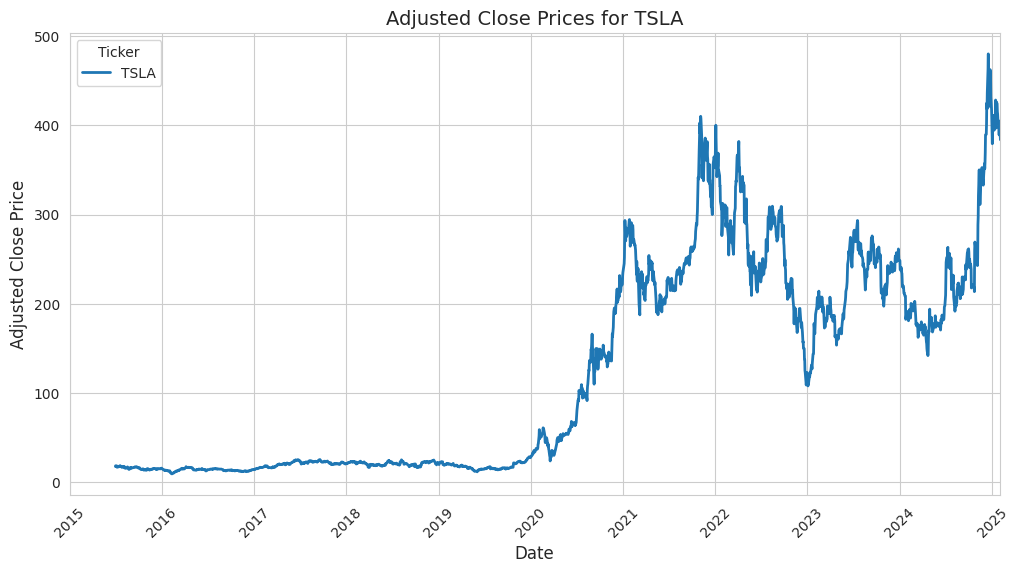

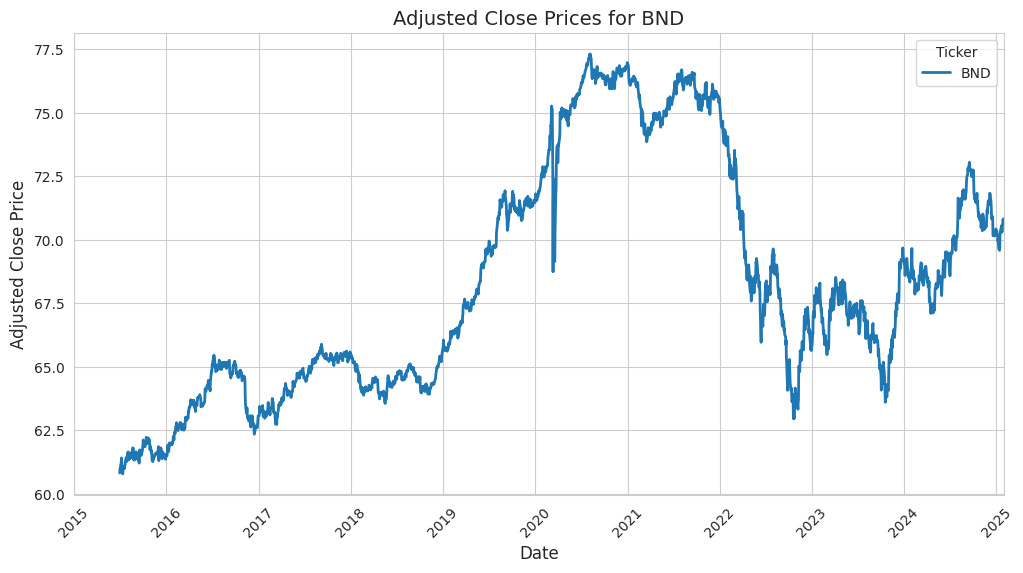

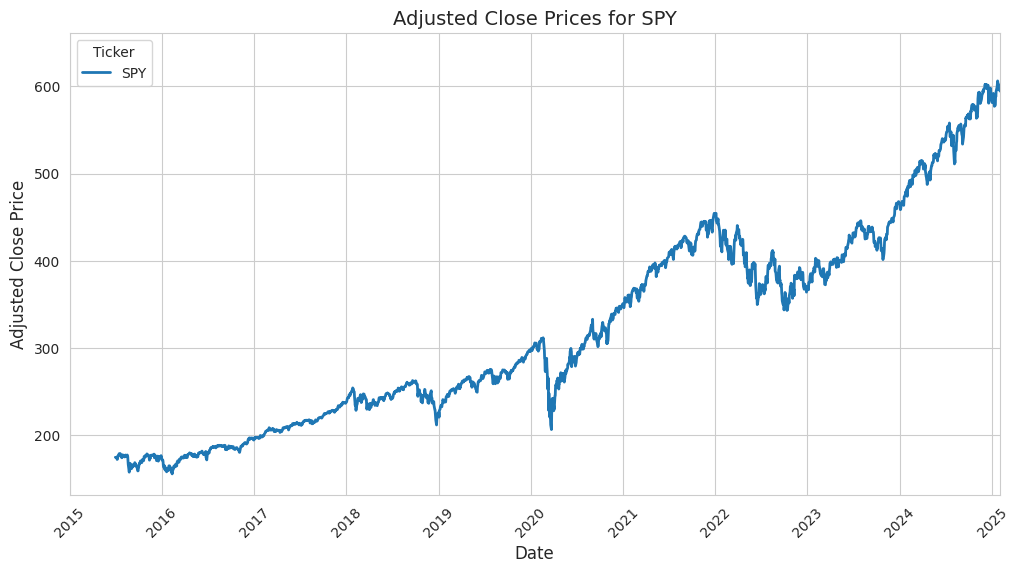

In [80]:
closePriceOverTime([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

**🗓️ Daily Return**

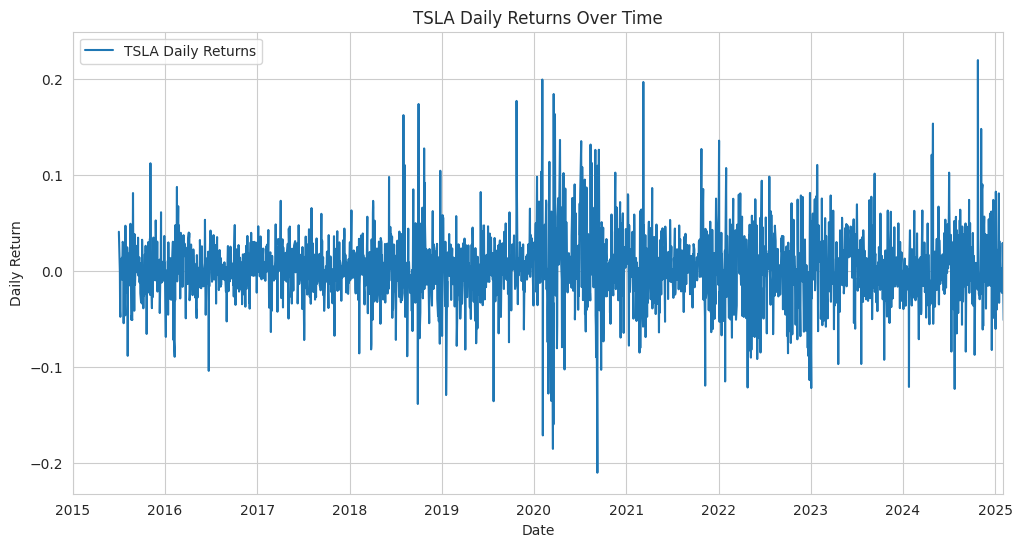

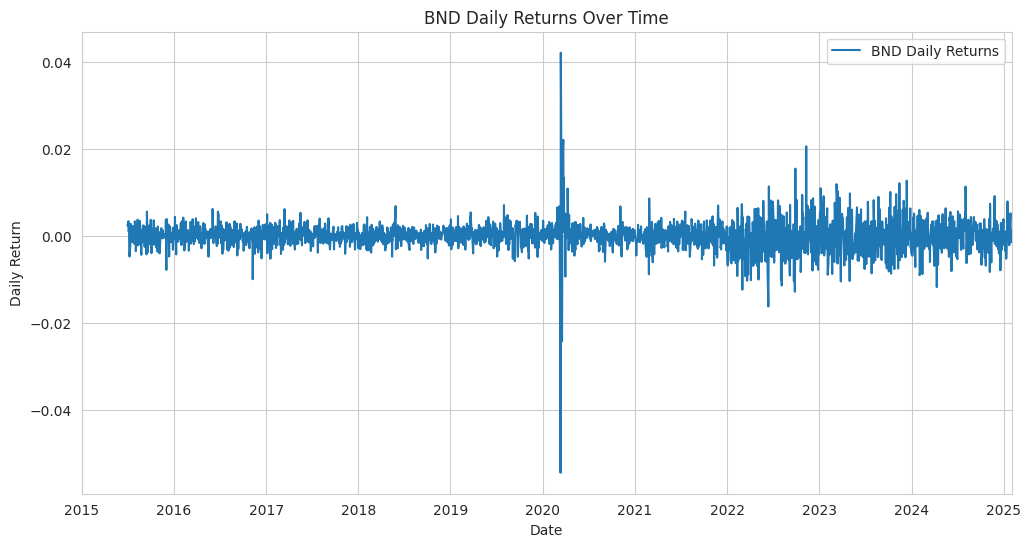

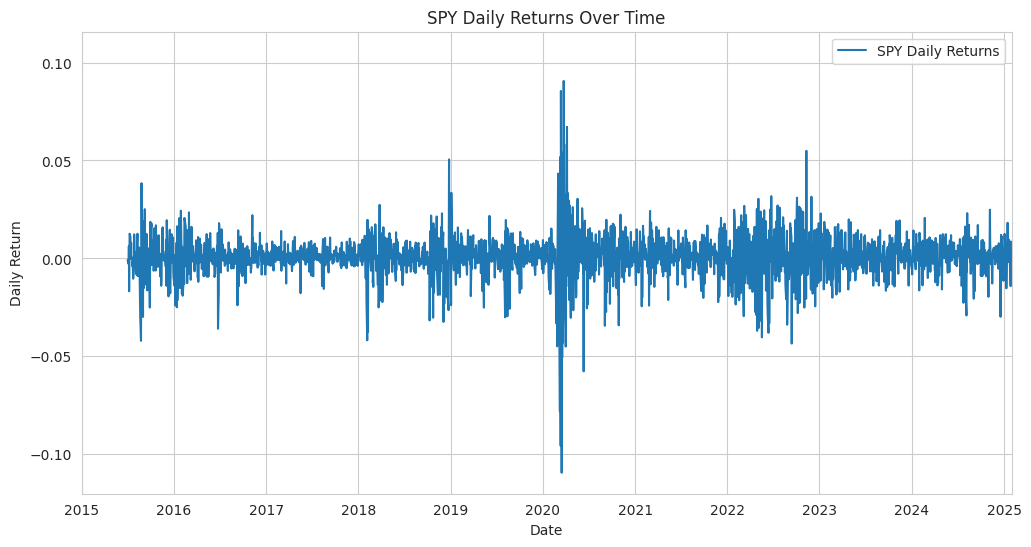

In [65]:
dailyReturn([tsla_data.reset_index(),bnd_data.reset_index(),spy_data.reset_index()], ['TSLA','BND','SPY'])

# Volatility with shaded volatility range

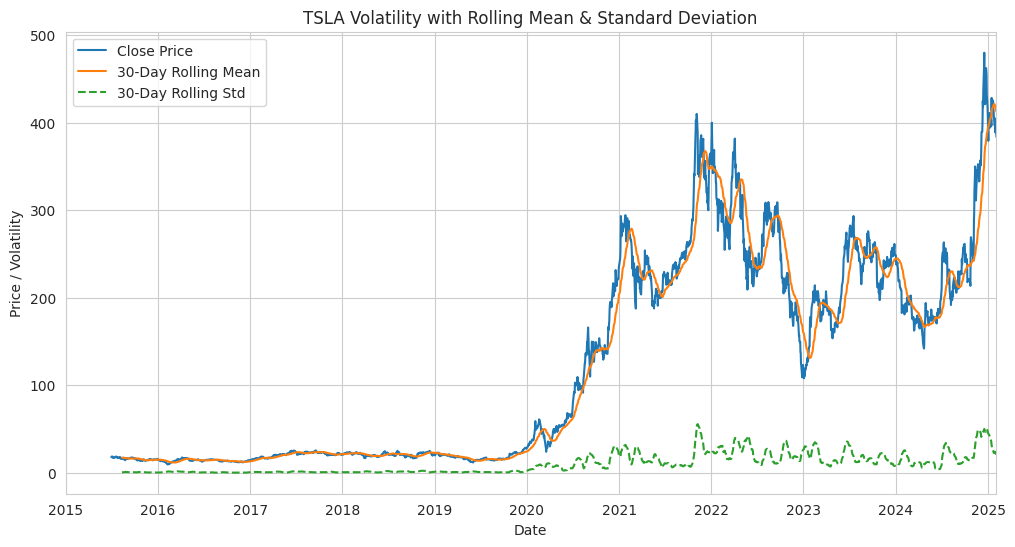

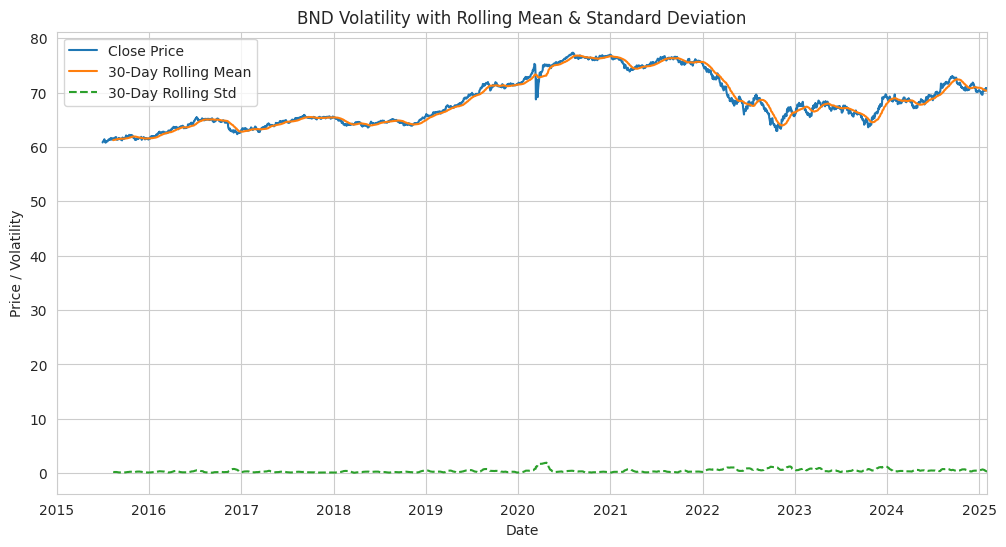

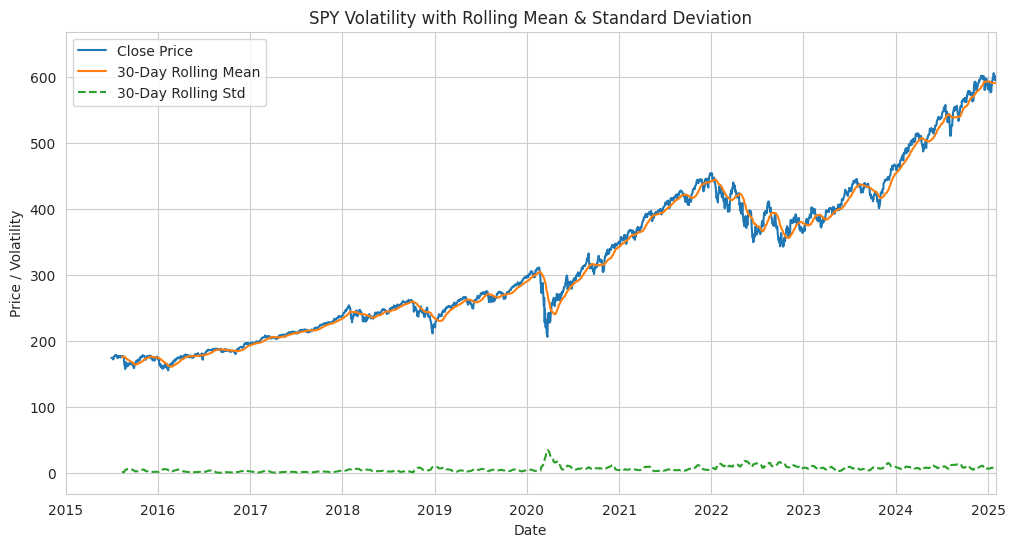

In [66]:
rollingAvgAndStd([tsla_data.reset_index(),bnd_data.reset_index(),spy_data.reset_index()], ['TSLA','BND','SPY'])

# Outliers

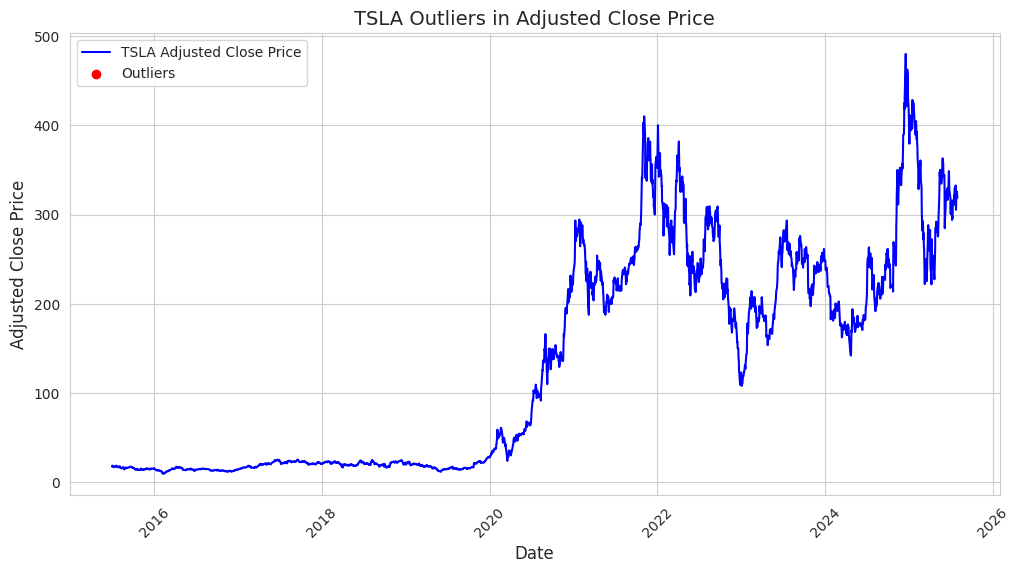


Outliers for TSLA:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


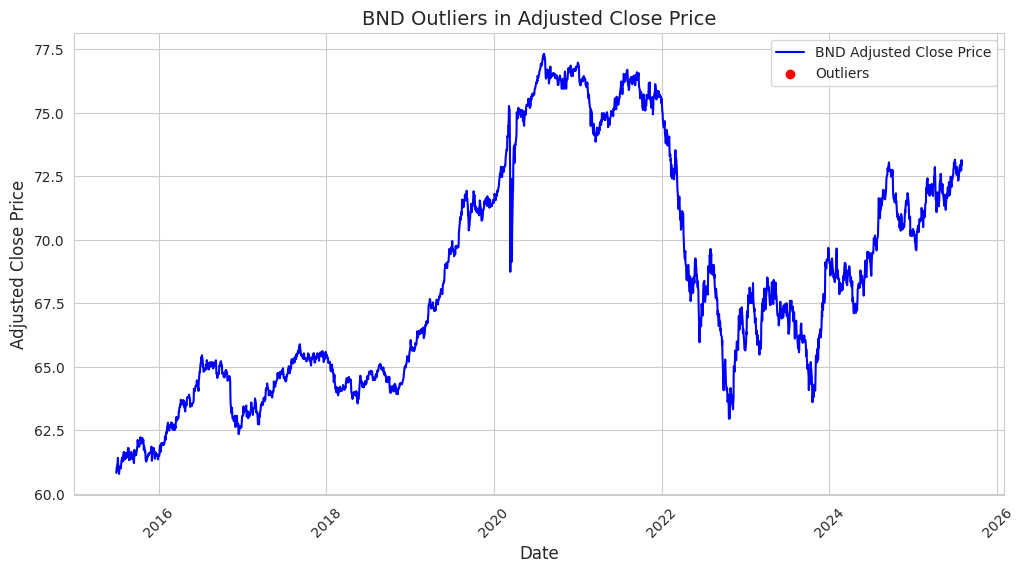


Outliers for BND:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


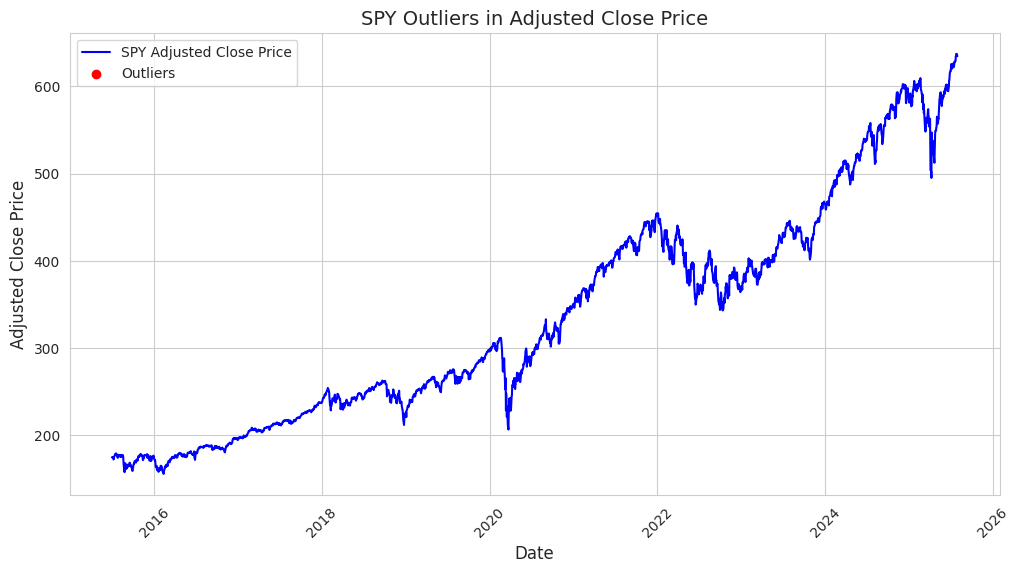


Outliers for SPY:
Empty DataFrame
Columns: [Price, Adj Close, Z-Score]
Index: []


In [67]:
detect_outliers([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

**Remove Outlier**

In [68]:
cleaned_tsla, cleaned_bnd, cleaned_spy = remove_outliers([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])


Removed Outliers for TSLA:
No outliers found.

Removed Outliers for BND:
No outliers found.

Removed Outliers for SPY:
No outliers found.


In [69]:
print(cleaned_tsla.loc['2025-12-17'] if '2025-12-17' in cleaned_tsla.index else "Outlier removed!")

Outlier removed!


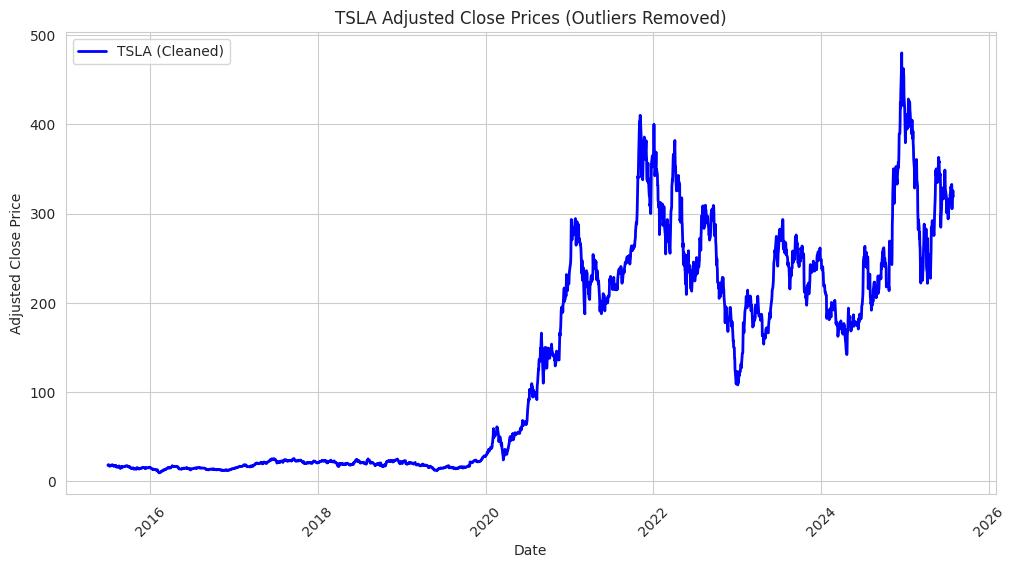

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_tsla.index, cleaned_tsla['Adj Close'], label="TSLA (Cleaned)", linewidth=2, color="blue")
plt.title("TSLA Adjusted Close Prices (Outliers Removed)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Unusual High and Low Returns**

Calculate Daily returns

In [71]:
calc_daily_return

<function scripts.preprocess_data.calc_daily_return(stockData, tickers)>

# Daily Percentage Change

In [72]:
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100

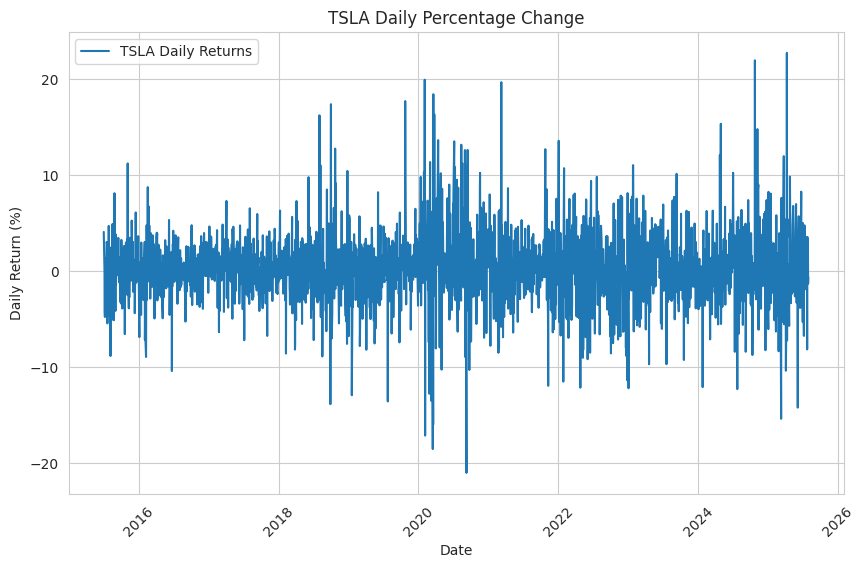

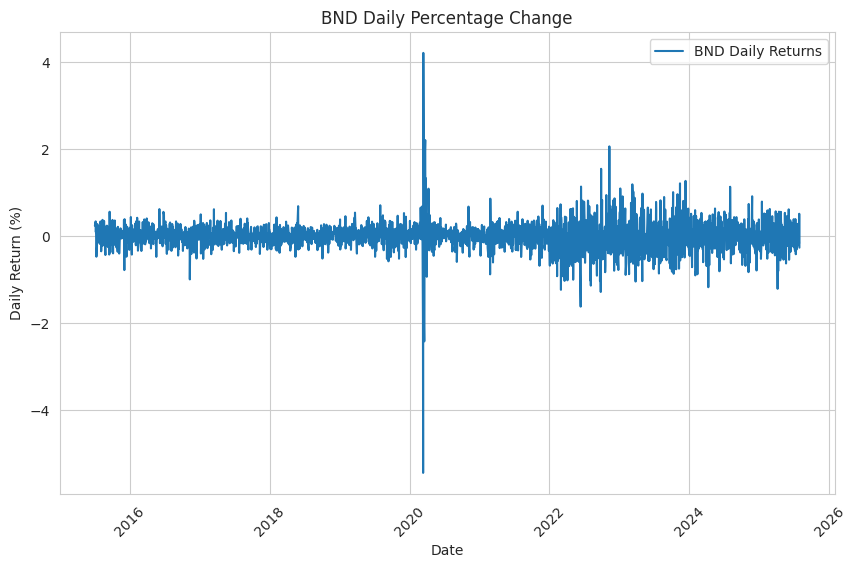

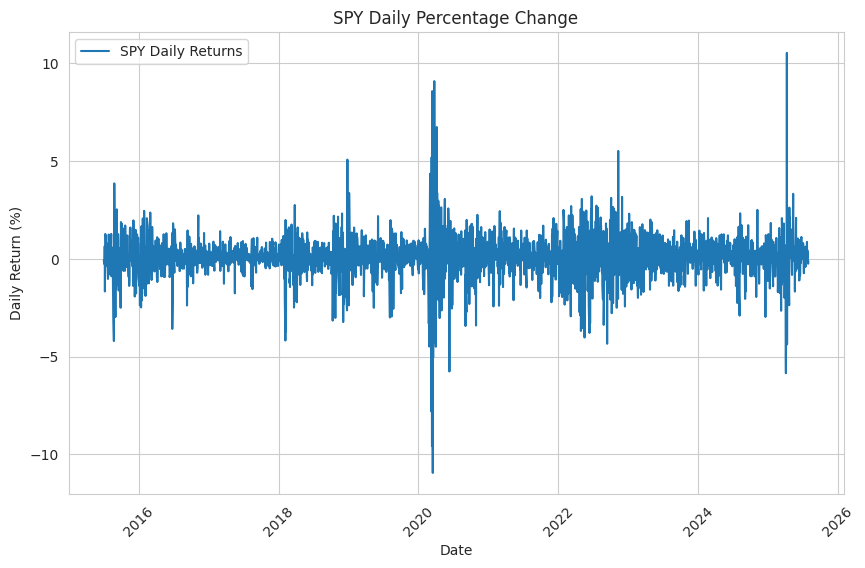

In [73]:
plot_daily_percentage([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])

# Unusual High/Low Returns

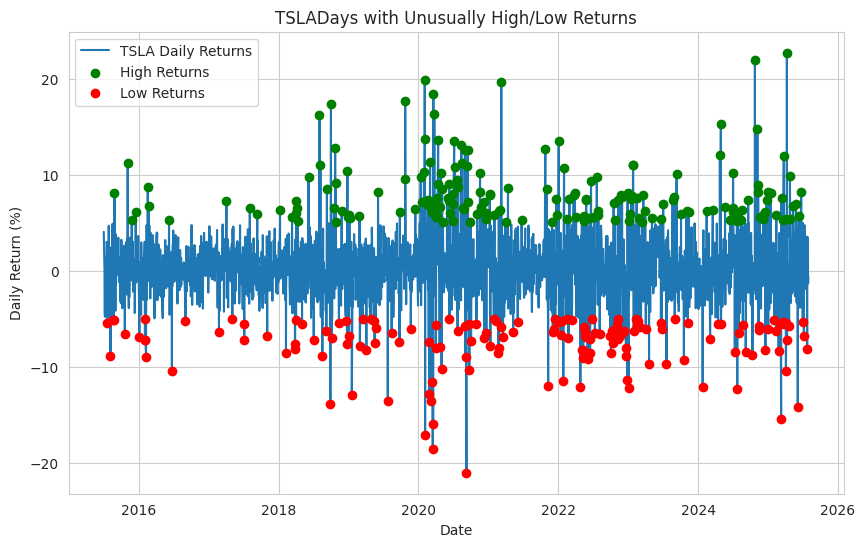

TSLAHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-08-27     8.072407
2015-11-04    11.173506
2015-11-25     5.218781
2015-12-16     6.069926
2016-02-17     8.706566
...                 ...
2025-04-25     9.803091
2025-05-12     6.745790
2025-05-27     6.939948
2025-06-10     5.674383
2025-06-23     8.231931

[179 rows x 1 columns]


TSLALow Returns for:
Price      Daily Return
Ticker                 
Date                   
2015-07-21    -5.487851
2015-08-06    -8.884613
2015-08-20    -5.120475
2015-08-24    -5.156654
2015-10-20    -6.606755
...                 ...
2025-04-21    -5.746363
2025-06-05   -14.259894
2025-07-01    -5.335898
2025-07-07    -6.789283
2025-07-24    -8.197020

[156 rows x 1 columns]




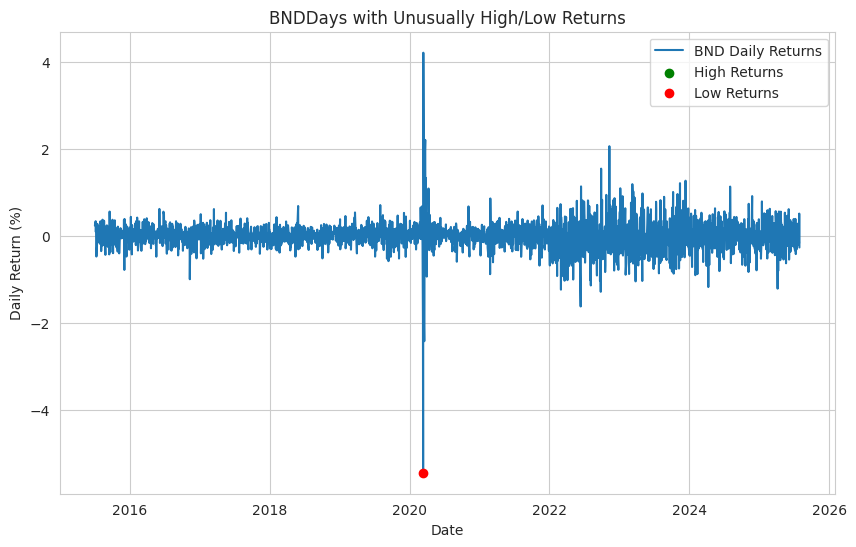

BNDHigh Returns for:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


BNDLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-12    -5.438477




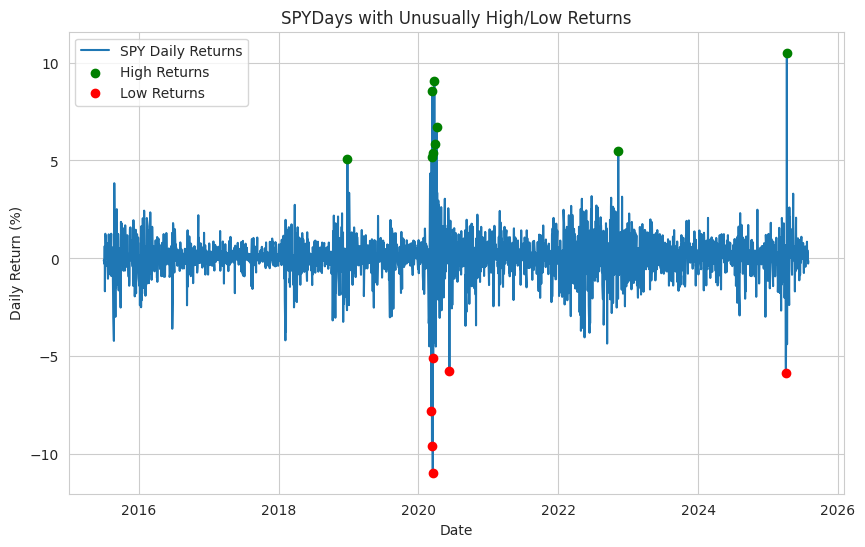

SPYHigh Returns for:
Price      Daily Return
Ticker                 
Date                   
2018-12-26     5.052495
2020-03-10     5.174500
2020-03-13     8.548635
2020-03-17     5.399207
2020-03-24     9.060329
2020-03-26     5.838979
2020-04-06     6.716615
2022-11-10     5.495439
2025-04-09    10.501936


SPYLow Returns for:
Price      Daily Return
Ticker                 
Date                   
2020-03-09    -7.809426
2020-03-12    -9.567727
2020-03-16   -10.942375
2020-03-18    -5.063302
2020-06-11    -5.764893
2025-04-04    -5.854296




In [74]:
# Ensure 'Daily Return' exists and 'Date' is the index
for df in [tsla_data, bnd_data, spy_data]:
    if 'Close' in df.columns and 'Daily Return' not in df.columns:
        df['Daily Return'] = df['Close'].pct_change() * 100
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)

# Call the function
plot_significant_anomalies([tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])

# ❄ Time Series Decomposition

**Seasonality and Trends**

<Figure size 1200x600 with 0 Axes>

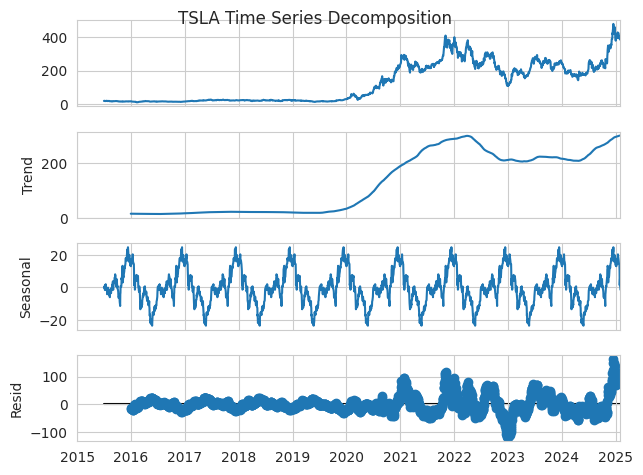

<Figure size 1200x600 with 0 Axes>

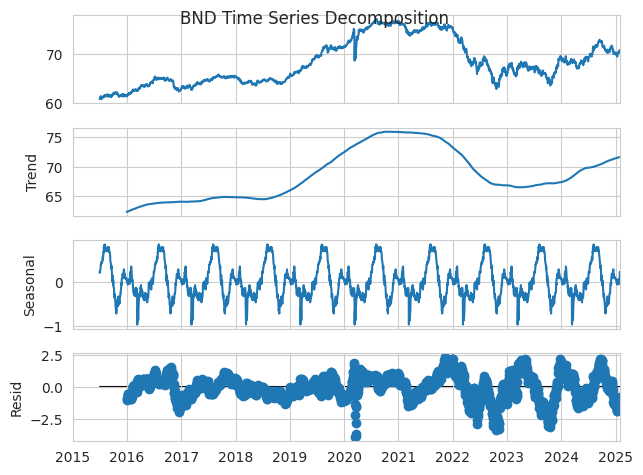

<Figure size 1200x600 with 0 Axes>

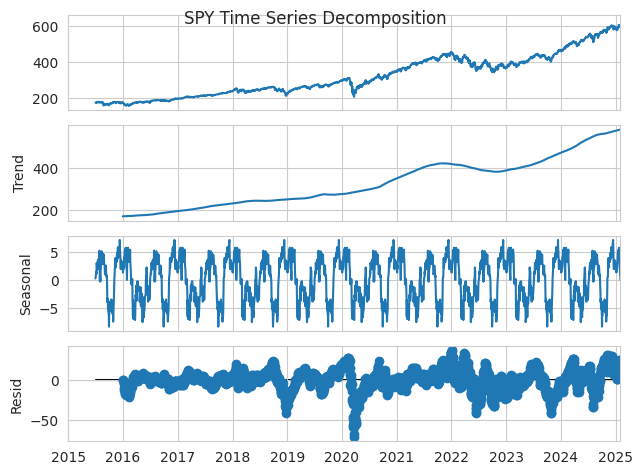

In [75]:
timeSeriesDecomposition([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

# Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

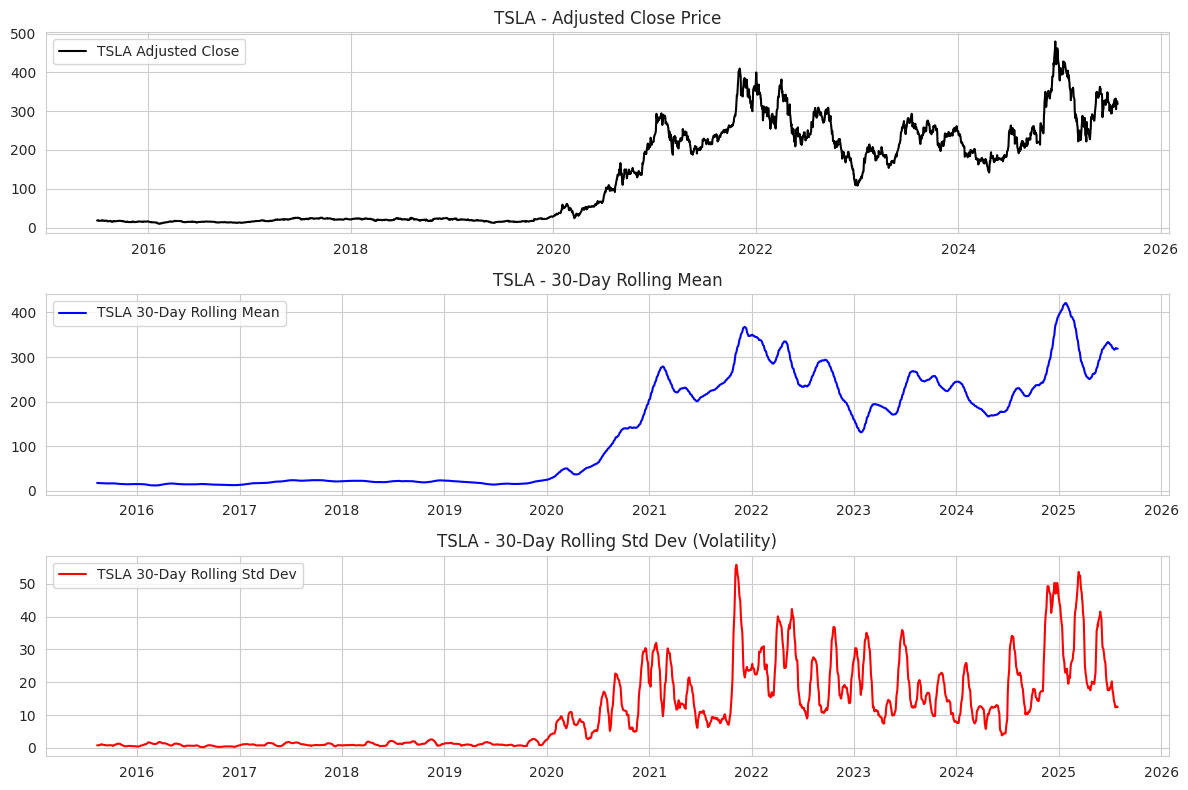

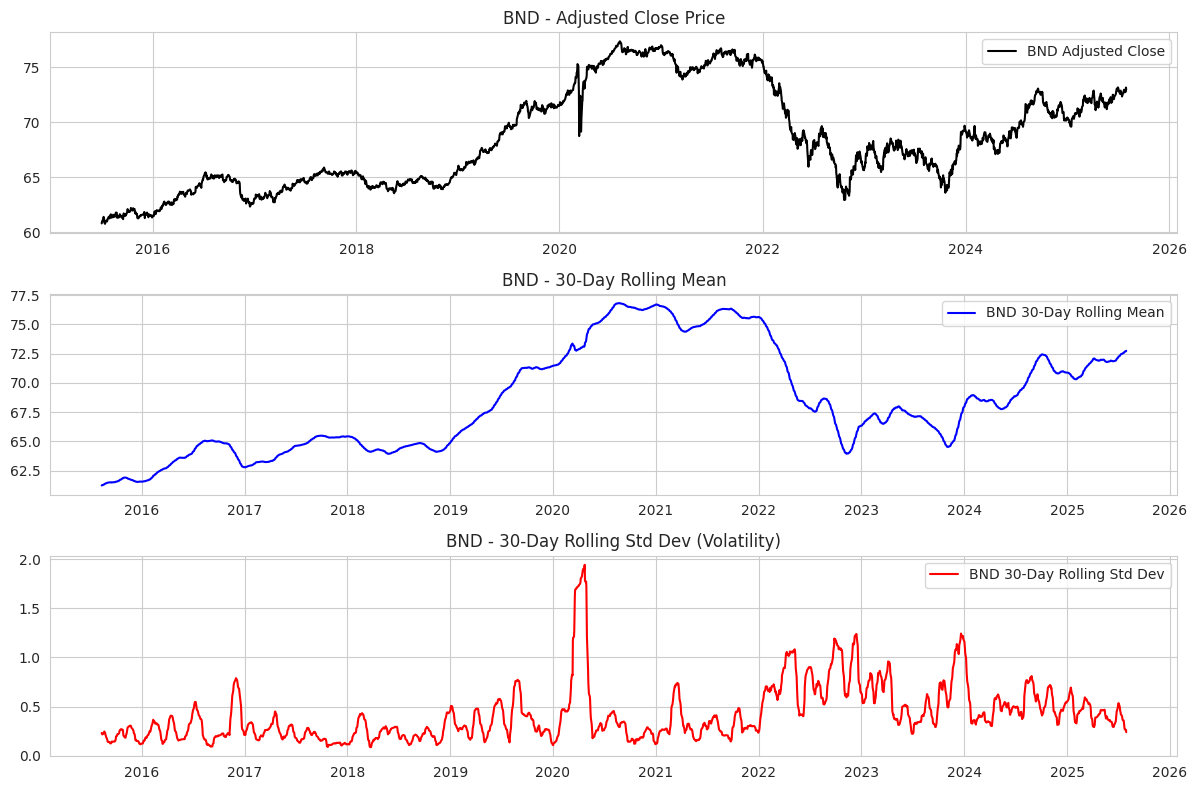

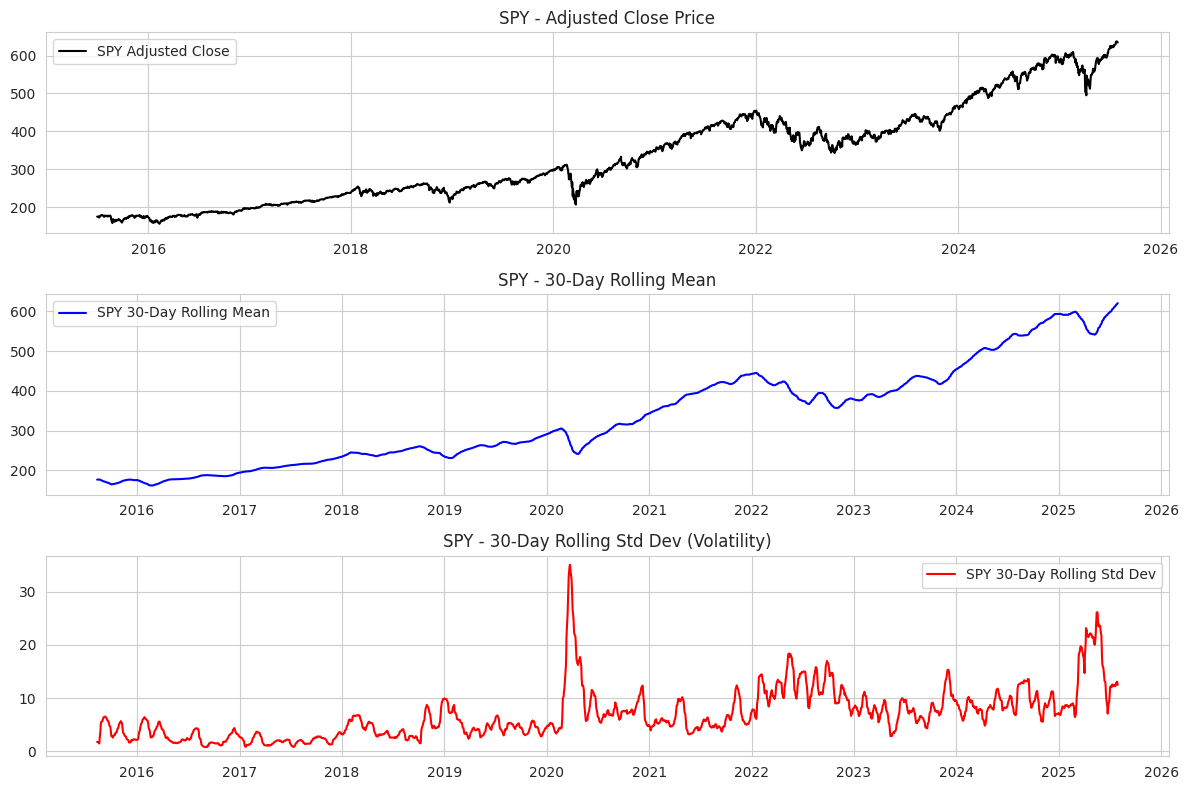

In [76]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size, [tsla_data, bnd_data, spy_data], ['TSLA', 'BND', 'SPY'])

# ❗Value at Risk(VaR) and Sharpe Ratio

Skipping TSLA: 'Daily_Return' column not found.
Skipping BND: 'Daily_Return' column not found.
Skipping SPY: 'Daily_Return' column not found.


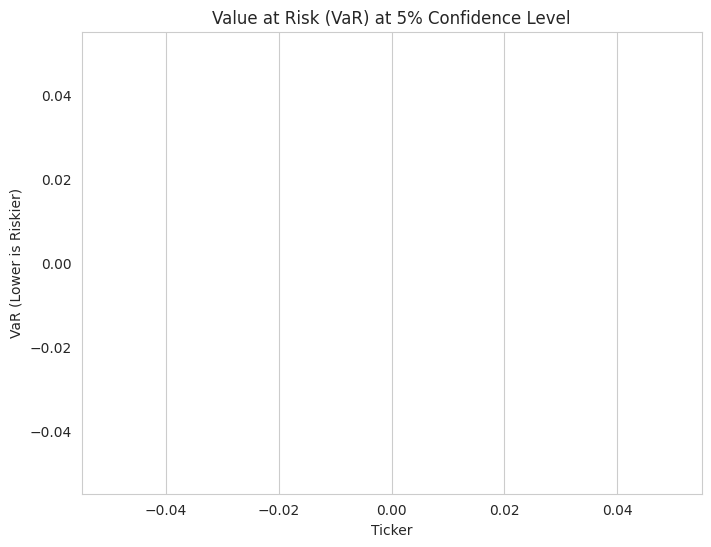

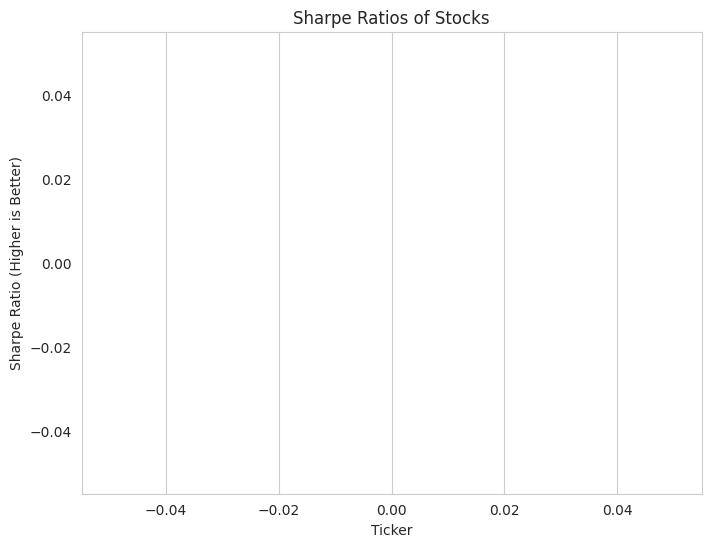


Value at Risk (VaR) at 5% Confidence Level:

Sharpe Ratios:


In [77]:
varAndSharpeRatio([tsla_data,bnd_data,spy_data], ['TSLA','BND','SPY'])

# **Develop Time Series Forecasting Models**

**This task involves building a time series forecasting model to predict Tesla's future stock prices. You will choose from classical statistical models like ARIMA and SARIMA, or deep learning models like LSTM.**

    - Step 1: Load and Prepare the Data
    - Step 2: Split the Data
           - 80% of the data for training and 20% for testing.
    - Step 3: Choose and Train the Model
    - step 4: Evaluate the Model Performance using MAE,RMSE,MAPE
    - Step 5: Optimize Model Parameters
              - using auto_arima from pmdarima
              - Hyperparameter Tuning for LSTM: using epochs, and batch sizes to find the optimal configuration
    - Step 6: Forecast Future Prices
             - Make Predictions using the final chosen model

In [79]:
# Run forecasting for Tesla
from scripts.features import*
# results_tesla = run_forecasting(['tesla']['Close'], 'Tesla (TSLA)',seasonal_order=(1, 1, 1, 12))
run_forcast(tsla_data['Close'])
#results_tesla = run_forecasting(tsla_data['Close'], 'Tesla (TSLA)', seasonal_order=(1, 1, 1, 12))

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# **📊 Forecast Future Market Trends**

In [ ]:
!pip install pmdarima

In [ ]:
!pip install --upgrade --no-deps --force-reinstall numpy